# Titanic Project

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading Data and Understanding the Data structure

In [70]:
df= pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [71]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [73]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Analysing Based on the sample gender predictaion 

<Axes: xlabel='Survived', ylabel='count'>

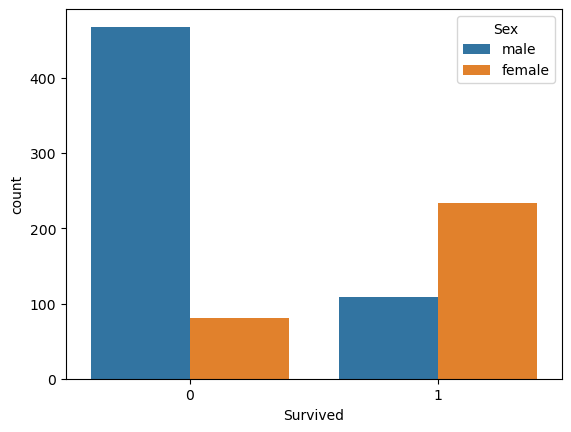

In [75]:
sns.countplot(data=df, x= "Survived", hue="Sex")

From the above graph, we can observe that the survival rate of females is higher than that of males. This indicates that a greater proportion of females survived compared to males

### Feature Exploration

C:\Users\bhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


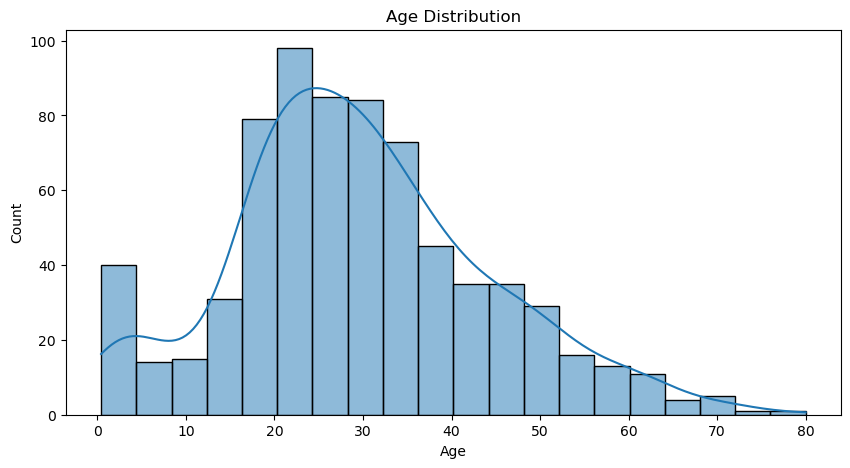

In [76]:
# Age distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Age'].dropna(), kde=True, bins=20)
plt.title('Age Distribution')
plt.show()

C:\Users\bhavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


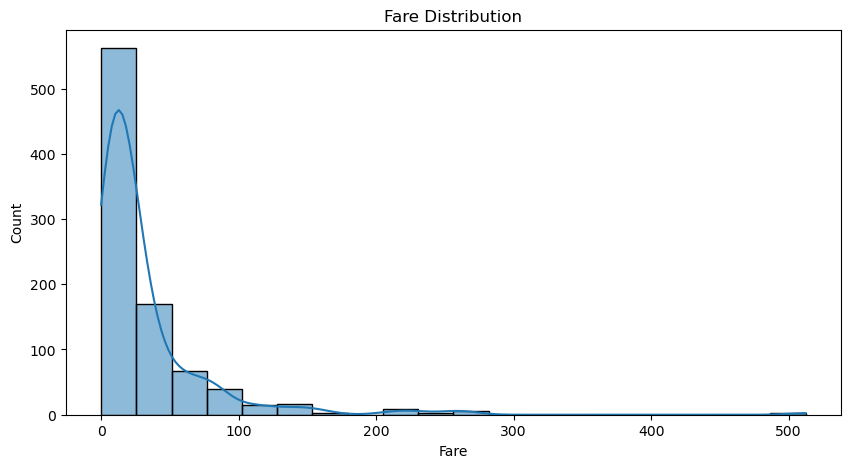

In [77]:
# Fare distribution
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'].dropna(), kde=True, bins=20)
plt.title('Fare Distribution')
plt.show()

The fare distribution is heavily right-skewed, with most passengers paying fares under 100.
A large number of passengers paid fares close to zero.
There are a few passengers who paid much higher fares, creating a long tail in the distribution

### Feature Engineering

In [78]:
df["Age"].dropna().sample(df["Age"].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [79]:
df[df["Age"].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [80]:
#### Preplacing the nan value with random sample
def impute_nan(df,Varaible):
    df[Varaible+"_random"]=df[Varaible]
    random_sample= df[Varaible].dropna().sample(df[Varaible].isnull().sum(),random_state=0)
    random_sample.index= df[df[Varaible].isnull()].index
    df.loc[df[Varaible].isnull(), Varaible+"_random"]=random_sample

In [81]:
impute_nan(df,"Age")
impute_nan(test_df,"Age")

In [82]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,22.0


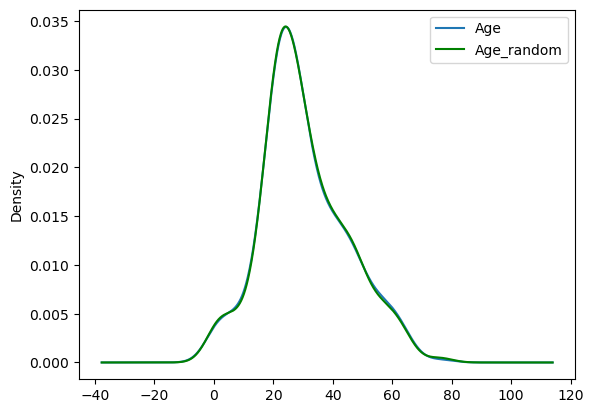

In [83]:
# Analysing the Age vs Impute_NAN_Age
fig=plt.figure()
ax=fig.add_subplot(111)
test_df["Age"].plot(kind="kde",ax=ax)
test_df["Age_random"].plot(kind="kde",ax=ax, color="Green")
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [84]:
def Age_group(Age_random):
    if Age_random < 13:
        return 'Child'
    elif 13 <= Age_random < 18:
        return 'Teen'
    elif 18 <= Age_random < 35:
        return 'Young Adult'
    elif 35 <= Age_random < 60:
        return 'Adult'
    else:
        return 'Senior'

# Apply the function to the 'age' column to create the 'agegroup' column
df['Age_group'] = df['Age_random'].apply(Age_group)
test_df['Age_group'] = df['Age_random'].apply(Age_group)

In [85]:
df["Age_group"].unique()

array(['Young Adult', 'Adult', 'Child', 'Teen', 'Senior'], dtype=object)

In [86]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adult


In [87]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1

df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)


In [88]:
def extract_title(name):
    return name.split(',')[1].split('.')[0].strip()

df['Title'] = df['Name'].apply(extract_title)
test_df['Title'] = test_df['Name'].apply(extract_title)



In [89]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [90]:
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Don': 'Rare',
    'Rev': 'Rare',
    'Dr': 'Rare',
    'Mme': 'Rare',
    'Ms': 'Miss',
    'Major': 'Rare',
    'Lady': 'Rare',
    'Sir': 'Rare',
    'Mlle': 'Rare',
    'Col': 'Rare',
    'Capt': 'Rare',
    'the Countess': 'Rare',
    'Jonkheer': 'Rare'
}

df['Title'] = df['Title'].map(title_mapping)
test_df['Title'] = test_df['Title'].map(title_mapping)

df['Title'].fillna('Rare', inplace=True)
test_df['Title'].fillna('Rare', inplace=True)


In [91]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_random,Age_group,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,Young Adult,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,Adult,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0,Young Adult,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0,Adult,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0,Adult,1,1,Mr


In [92]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [93]:
def clean(data):
    data.drop(["PassengerId","Age","Age_random","Name","Ticket"], axis=1, inplace= True)
    data["Embarked"].fillna("M", inplace=True)
    return data
    
train=clean(df)
test=clean(test_df)

In [94]:
#Replace the embarked nan call with "m'
train["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [95]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Title
0,0,3,male,1,0,7.2500,NaN,S,Young Adult,2,0,Mr
1,1,1,female,1,0,71.2833,C85,C,Adult,2,0,Mrs
2,1,3,female,0,0,7.9250,NaN,S,Young Adult,1,1,Miss
3,1,1,female,1,0,53.1000,C123,S,Adult,2,0,Mrs
4,0,3,male,0,0,8.0500,NaN,S,Adult,1,1,Mr


In [96]:
# Extract the first letter of the cabin as Deck information
train['Cabin'] = train['Cabin'].str[0]
test['Cabin'] = test['Cabin'].str[0]

# Replace missing values with 'U' (Unknown)
train['Cabin'].fillna('U', inplace=True)
test['Cabin'].fillna('U', inplace=True)

In [97]:
test.head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Title
0,3,male,0,0,7.8292,U,Q,Young Adult,1,1,Mr
1,3,female,1,0,7.0000,U,S,Adult,2,0,Mrs
2,2,male,0,0,9.6875,U,Q,Young Adult,1,1,Mr
3,3,male,0,0,8.6625,U,S,Adult,1,1,Mr
4,3,female,1,1,12.2875,U,S,Adult,3,0,Mrs


In [98]:
from sklearn.preprocessing import LabelEncoder

In [99]:
def apply_label_encoder(train, test, columns):
    label_encoders={}
    for column in columns:
        le= LabelEncoder()
        train[column]=le.fit_transform(train[column])
        test[column]=le.transform(test[column])
        label_encoders[column]=le
    return train,test

In [100]:
train_LabelEncoder, test_LabelEncoder=apply_label_encoder(train, test, columns=['Sex',"Embarked", "Cabin","Title", "Age_group"])

In [101]:
train_LabelEncoder.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,Age_group,FamilySize,IsAlone,Title
0,0,3,1,1,0,7.2500,8,3,4,2,0,2
1,1,1,0,1,0,71.2833,2,0,0,2,0,3
2,1,3,0,0,0,7.9250,8,3,4,1,1,1
3,1,1,0,1,0,53.1000,2,3,0,2,0,3
4,0,3,1,0,0,8.0500,8,3,0,1,1,2


In [102]:
test_LabelEncoder.isnull().sum()

Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          1
Cabin         0
Embarked      0
Age_group     0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [103]:
test['Fare'] = test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.median()))

In [104]:
train_LabelEncoder.isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      0
Age_group     0
FamilySize    0
IsAlone       0
Title         0
dtype: int64

In [105]:
corr=train_LabelEncoder.corr()
corr["Survived"].sort_values(ascending=False)

Survived      1.000000
Fare          0.257307
Parch         0.081629
FamilySize    0.016639
SibSp        -0.035322
Age_group    -0.052025
Title        -0.058000
Embarked     -0.174963
IsAlone      -0.203367
Cabin        -0.301116
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

<Axes: >

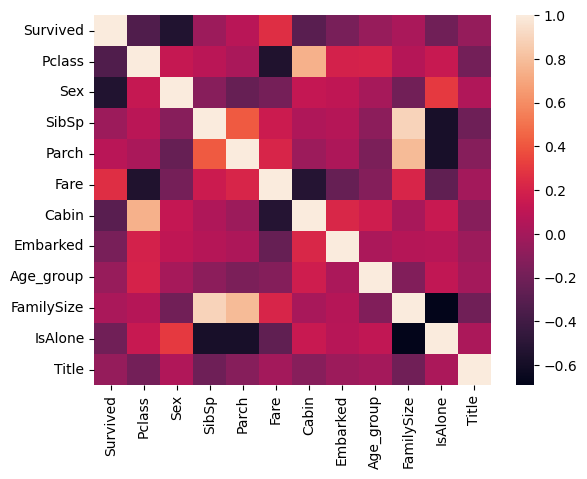

In [106]:
sns.heatmap(train_LabelEncoder.corr())

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
x_train=train_LabelEncoder.drop('Survived', axis=1)
y_train= train_LabelEncoder['Survived']

In [109]:
model = LogisticRegression(max_iter=500)
model

LogisticRegression(max_iter=500)

In [110]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=500)

In [111]:
y_pred_train = model.predict(x_train)

In [112]:
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Classification Report:\n", classification_report(y_train, y_pred_train))

Training Accuracy: 0.797979797979798
Confusion Matrix:
 [[470  79]
 [101 241]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.75      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.78       891
weighted avg       0.80      0.80      0.80       891



In [113]:
x_test = test_LabelEncoder
y_pred_test = model.predict(x_test)

In [114]:
y_pred_test

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [115]:
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('test.csv')['PassengerId'],
    'Survived': y_pred_test
})

submission.to_csv('submission.csv', index=False)
print("Submission file created with PassengerId and Survived columns!")

Submission file created with PassengerId and Survived columns!
